<a href="https://colab.research.google.com/github/YLysov0017/Pproject/blob/master/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [22]:
import pandas as pd
df = pd.read_csv("/content/wine-clustering.csv")# чтение файла
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [16]:
# your_code here
'''
df_cleaned = df.dropna()
df_cleaned.describe()
# Нет не заполненных клеток
'''
'''
dupls = df.duplicated()
count = 0
for i in dupls:
  if (i): count +=1

count
#Дублей тоже нет
'''

Q1 =  df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_IQR = df[(df > (Q1-1.5*IQR )) & (df < (Q3+1.5*IQR))]

df = df_IQR.copy()
df.describe()
#Подрезал максимум межквартильным размахом


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,174.000000,173.000000,174.000000,174.000000,178.000000,178.000000,178.000000,176.000000,173.000000,177.000000,178.000000,178.000000
mean,13.000618,2.262759,2.370116,19.382184,98.655172,2.295112,2.029270,0.361854,1.570000,4.876243,0.953198,2.611685,746.893258
std,0.811827,1.016522,0.240445,3.060238,12.386201,0.625851,0.998859,0.124453,0.540359,2.078815,0.222049,0.709990,314.907474
min,11.030000,0.740000,1.710000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.592500,2.220000,17.200000,88.000000,1.742500,1.205000,0.270000,1.247500,3.170000,0.780000,1.937500,500.500000
50%,13.050000,1.830000,2.360000,19.450000,97.500000,2.355000,2.135000,0.340000,1.545000,4.600000,0.960000,2.780000,673.500000
75%,13.677500,2.982500,2.550000,21.500000,106.750000,2.800000,2.875000,0.437500,1.950000,6.000000,1.120000,3.170000,985.000000
max,14.830000,5.040000,2.920000,27.000000,134.000000,3.880000,5.080000,0.660000,2.960000,10.260000,1.450000,4.000000,1680.000000


In [25]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

num_features = df.select_dtypes(include=['float64']).columns
df_scaled = df.copy()
df_scaled[num_features] = min_max_scaler.fit_transform(df[num_features])
df = df_scaled.copy()
df # Отскалировано
# Категориальных признаков нет

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,127,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,1065
1,0.571053,0.205534,0.417112,0.030928,100,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,1050
2,0.560526,0.320158,0.700535,0.412371,101,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,1185
3,0.878947,0.239130,0.609626,0.319588,113,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,1480
4,0.581579,0.365613,0.807487,0.536082,118,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,95,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,740
174,0.623684,0.626482,0.598930,0.639175,102,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,750
175,0.589474,0.699605,0.481283,0.484536,120,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,835
176,0.563158,0.365613,0.540107,0.484536,120,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,840


Text(0.5, 1.0, 'Распределение данных в двумерном пространстве')

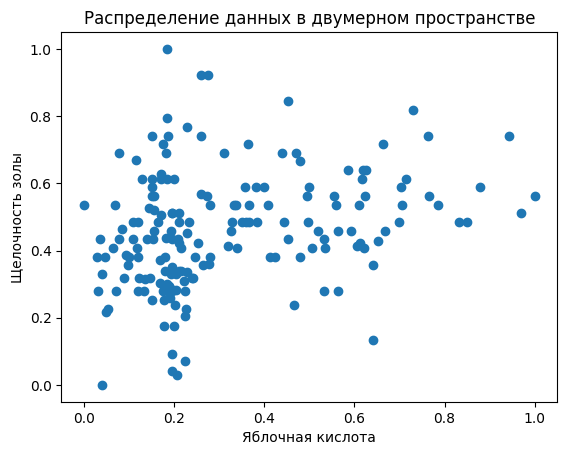

In [27]:
import matplotlib.pyplot as plt
plt.scatter(df["Malic_Acid"], df["Ash_Alcanity"])
plt.xlabel('Яблочная кислота')
plt.ylabel('Щелочность золы')
plt.title('Распределение данных в двумерном пространстве')

In [29]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""
from sklearn.cluster import KMeans

X = df[["Malic_Acid", "Ash_Alcanity"]]
kmeans = KMeans(n_clusters=2)

kmeans.fit(X)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
print(cluster_centers)
print(cluster_labels)

[[0.60635339 0.52529591]
 [0.18881487 0.4294147 ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# your_code here

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


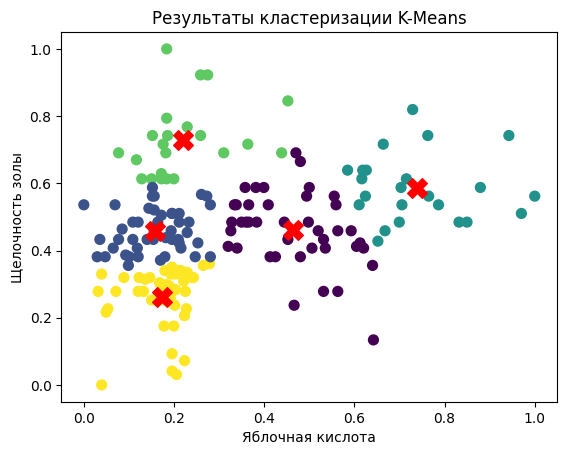

In [31]:
kmeans = KMeans(n_clusters=5)

kmeans.fit(X)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_


plt.scatter(df["Malic_Acid"], df["Ash_Alcanity"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Яблочная кислота')
plt.ylabel('Щелочность золы')
plt.title('Результаты кластеризации K-Means')
plt.show()

In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""


In [ ]:
# your_code here

In [43]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

x_scaler = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps=0.30, min_samples=4)
dbscan.fit(x_scaler)

labels = dbscan.labels_

labels

array([ 0,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  0,  0,
        0,  0, -1,  0,  3,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  3,  0, -1,  0,  3, -1,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  5,  5, -1, -1,  0,  0,  3, -1,  4,  0,  0, -1,  4,  0,
        0,  0,  5,  1, -1,  0,  0,  0, -1,  0,  0,  1,  0,  0,  3,  0,  0,
        1,  0,  0, -1,  0,  0,  0,  0,  3,  1,  0, -1,  0,  0,  0,  0, -1,
        3,  0, -1, -1, -1, -1,  1,  0, -1,  5, -1,  0,  0, -1,  6,  0,  0,
       -1, -1,  3, -1,  1,  0, -1, -1,  3,  6, -1, -1,  6,  6, -1, -1,  5,
        3,  0, -1,  3, -1,  5,  0,  6,  3,  6,  3, -1, -1,  4,  3, -1, -1,
        3,  0,  0, -1,  4, -1,  0, -1])

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

In [ ]:
# your_code here

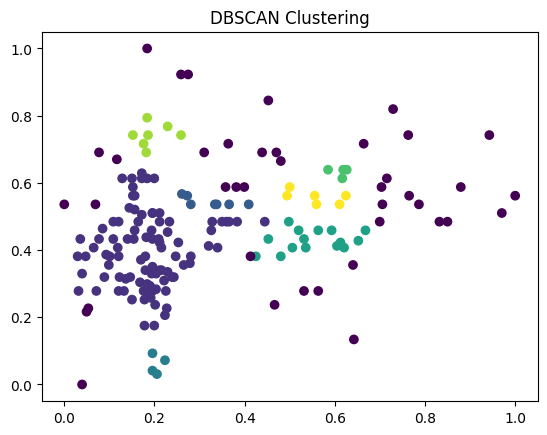

In [42]:
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

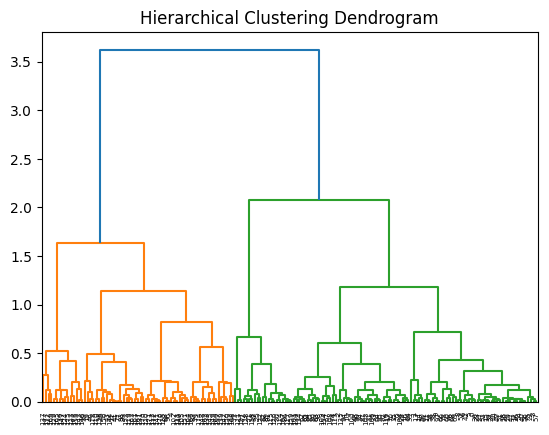

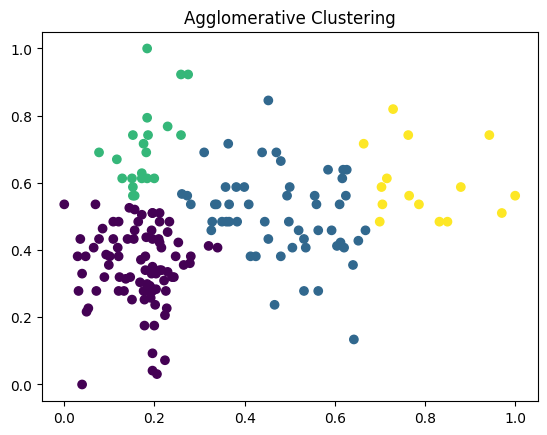

In [44]:
# your_code here
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Инициализация и обучение модели иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(X)

# Визуализация дендрограммы
from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Визуализация результатов кластеризации
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


Оптимальное число кластеров 3, с баллом 0.42636987049498704


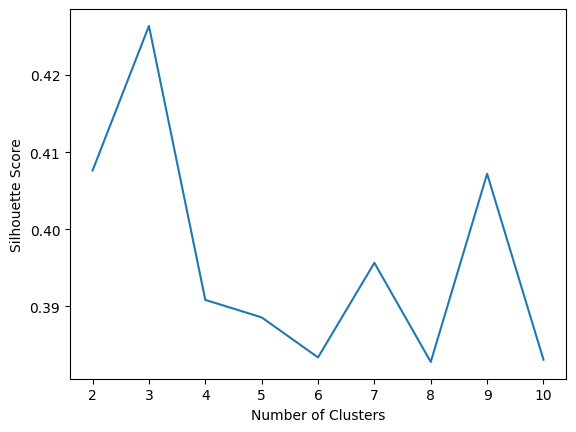

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Поиск оптимального K
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Оптимальное число кластеров 9, с баллом 166.01723925577286


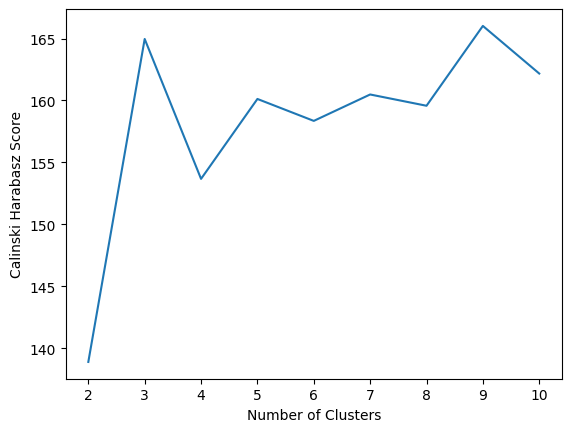

In [46]:

from sklearn.metrics import calinski_harabasz_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = calinski_harabasz_score(X_scaled, kmeans.labels_)
    scores.append(score)

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()


Оптимальное число кластеров 9, с баллом 0.7364552644681434


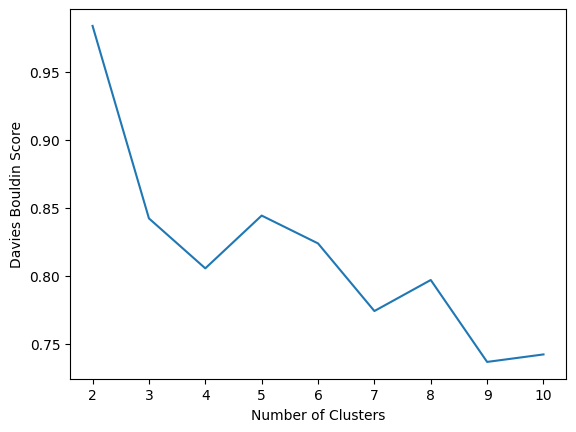

In [47]:

from sklearn.metrics import davies_bouldin_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = davies_bouldin_score(X_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(min(scores)) + 2}, с баллом {min(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()


In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [48]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=fdfba279f212e465e6d4694a5f1d9332f081c23306b6be2c3a951b92fbe6abda
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
   

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [50]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним


df['kmeans_cluster'] = kmeans.labels_
df['dbsscan_cluster'] = dbscan.labels_



# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



'\nНа отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма\n\nfrom ydata_profiling import ProfileReport\n\nProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)\n\n'

In [ ]:
# your_code here